<a href="https://colab.research.google.com/github/Azimshamsul/Test/blob/main/Telco_Customer_Churn_EDA_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.svm import SVC

In [3]:
data = pd.read_csv("Telco-Customer-Churn.csv")
print("Success")

Success


In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.shape

(7043, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Customer ID is removed as an unnecessary variable
data = data.drop(['customerID'], axis=1)
print("Success")

Success


In [8]:
# TotalCharges consists of numeric numbers, but the data type is object, let's convert it
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
print("Success")

Success


In [9]:
# Let's make the target variable numeric
data["Churn"] = [1 if i=="Yes" else 0 for i in data["Churn"]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
def check(df):
    print("  Shape  ".center(50, "#"))
    print(df.shape)
    print("\n")
    print("  Types  ".center(50, "#"))
    print(df.dtypes)
    print("\n")
    print("  Head  ".center(50, "#"))
    print(df.head())
    print("\n")
    print("  Tail  ".center(50, "#"))
    print(df.tail())
    print("\n")
    print("  Nan  ".center(50, "#"))
    print(df.isnull().sum())
    print("\n")
    print("  Quantiles  ".center(50, "#"))
    numeric_columns = df.select_dtypes(include=[np.number])
    print(numeric_columns.quantile([0, 0.05, 0.5, 0.95, 1]).T)
check(data)

####################  Shape  #####################
(7043, 20)


####################  Types  #####################
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


#####################  Head  #####################
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2   

In [11]:
# Let's examine the data types
def analyze_columns(df, threshold1=10, threshold2=20):
    categoric_cols = [col for col in df.columns if df[col].dtype == "O"]
    numeric_categoric = [col for col in df.columns if df[col].nunique() < threshold1 and df[col].dtype != "O"]
    categoric_cardinal = [col for col in df.columns if df[col].nunique() > threshold2 and df[col].dtype == "O"]
    categoric_cols = categoric_cols + numeric_categoric
    categoric_cols = [col for col in categoric_cols if col not in categoric_cardinal]

    numeric_cols = [col for col in df.columns if df[col].dtype != "O"]
    numeric_cols = [col for col in numeric_cols if col not in numeric_categoric]

    print(f"Total Rows : {df.shape[0]}")
    print(f"Total Column: {df.shape[1]}")
    print(f"Total Categorical Column : {len(categoric_cols)}")
    print(f"Total Numeric Columns : {len(numeric_cols)}")
    print(f"Total Categorical Cardinal Column : {len(categoric_cardinal)}")
    print(f"Total Numeric Categorical Column : {len(numeric_categoric)}")
    return(numeric_cols, categoric_cols)
numeric_cols, categoric_cols = analyze_columns(data)

Total Rows : 7043
Total Column: 20
Total Categorical Column : 17
Total Numeric Columns : 3
Total Categorical Cardinal Column : 0
Total Numeric Categorical Column : 2


In [12]:
# Relationship between variables and target variable
for col in data.columns[:-1]:
    print(f" {col} - Churn ".center(30, "#"))
    print(data[[col, "Churn"]].groupby([col]).mean().sort_values(by="Churn")[::-1].head())
    print(data[[col, "Churn"]].groupby([col]).mean().sort_values(by="Churn")[::-1].tail())
    print("-"*25)

####### gender - Churn #######
           Churn
gender          
Female  0.269209
Male    0.261603
           Churn
gender          
Female  0.269209
Male    0.261603
-------------------------
### SeniorCitizen - Churn ####
                  Churn
SeniorCitizen          
1              0.416813
0              0.236062
                  Churn
SeniorCitizen          
1              0.416813
0              0.236062
-------------------------
###### Partner - Churn #######
            Churn
Partner          
No       0.329580
Yes      0.196649
            Churn
Partner          
No       0.329580
Yes      0.196649
-------------------------
##### Dependents - Churn #####
               Churn
Dependents          
No          0.312791
Yes         0.154502
               Churn
Dependents          
No          0.312791
Yes         0.154502
-------------------------
####### tenure - Churn #######
           Churn
tenure          
1       0.619902
2       0.516807
5       0.481203
4       0.471591

In [13]:
# Let's examine the tenure, MonthlyCharges, TotalCharges variables more meaningfully
def target_summary(df, target, col_name):
    print(df.groupby(target).agg({col_name : "mean"}), end="\n\n\n")
for col in numeric_cols:
    target_summary(data, "Churn", col)

          tenure
Churn           
0      37.569965
1      17.979133


       MonthlyCharges
Churn                
0           61.265124
1           74.441332


       TotalCharges
Churn              
0       2555.344141
1       1531.796094




In [14]:
def missing_values(df):
    nan_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    num_miss = df[nan_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[nan_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([num_miss, np.round(ratio, 2)], axis=1, keys=["missing_number", "ratio"])
    print(missing_df, end="\n")
    print(f"\nTotal Missing Values : {num_miss.sum()}\n")
missing_values(data)
# Result: There are 11 empty values in TotalCharges. Let's fill it with median

              missing_number  ratio
TotalCharges              11   0.16

Total Missing Values : 11



In [15]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())
print("Success")

Success


In [16]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

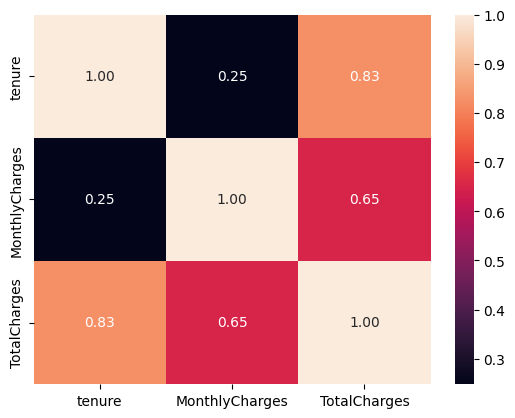

In [17]:
sns.heatmap(data[numeric_cols].corr(), annot=True, fmt=".2f")
plt.show()
# Result: TotalCharges has high correlation with tenure

In [18]:
numeric_cols.append("Churn")
corr_matrix = data[numeric_cols].corr()
print(corr_matrix["Churn"].sort_values(ascending=False))
numeric_cols.pop()
# Result: There is low correlation with the target variable

Churn             1.000000
MonthlyCharges    0.193356
TotalCharges     -0.199037
tenure           -0.352229
Name: Churn, dtype: float64


'Churn'

In [19]:
categoric_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen',
 'Churn']

In [20]:
# Drop churn variable
categoric_cols.pop()
categoric_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

In [21]:
data_copy = data.copy()
print("Success")

Success


In [22]:
# Encoding
def one_hot_encoder(df, categorical_cols):
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    return(df)
data_copy = one_hot_encoder(data_copy, categoric_cols)
data_copy.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,45,42.30,1840.75,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [23]:
X = data_copy.drop("Churn", axis=1)
y = data_copy["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

model = CatBoostClassifier(verbose=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Success rate : {round(accuracy_score(y_test, y_pred), 2)}")

Success rate : 0.79


In [24]:
def outlier_tresholds(df, col_name, q1=0.05, q3=0.95):
    quartiel1 = df[col_name].quantile(q1)
    quartiel3 = df[col_name].quantile(q3)
    quartiel_range = quartiel3 - quartiel1
    up = quartiel3 + 1.5*quartiel_range
    down = quartiel3 - 1.5*quartiel_range
    return(up, down)

def check_outlier(df, col_name):
    up, down = outlier_tresholds(df, col_name)
    filter = df[(df[col_name] > up) | (df[col_name] < down)].any(axis=None)
    if(filter == True):
        return(True)
    else:
        return(False)

def replace_outliers(df, col_name):
    up, down = outlier_tresholds(df, col_name)
    df.loc[(df[col_name] < down), col_name] = down
    df.loc[(df[col_name] > up), col_name] = up

for col in numeric_cols:
    print(f"{col} : {check_outlier(data, col)}")
    if(check_outlier(data, col)==True):
        replace_outliers(data, col)
# Result: There are no outliers

tenure : False
MonthlyCharges : False
TotalCharges : False


In [25]:
data["New_tenure_Year"] = [
    "0-1" if (i >= 0 and i <= 12 ) else
    "1-2" if (i > 12 and i <= 24) else
    "2-3" if (i > 24 and i <= 36) else
    "3-4" if (i > 36 and i <= 48) else
    "4-5" if (i > 48 and i <= 60) else
    "5-6" for i in data["tenure"]
]

data["New_Engaged"] = [1 if(i == "One year" or i == "Two year") else 0 for i in data["Contract"]]
data["New_noProt"] = [1 if(i != "Yes" or j != "Yes" or k != "Yes") else 0 for i,j,k in zip(data["OnlineBackup"], data["DeviceProtection"], data["TechSupport"])]
data["New_Young_not_Engaged"] = [1 if(i == 0 and j == 0) else 0 for i,j in zip(data["New_Engaged"], data["SeniorCitizen"])]
data["New_Total_Services"] = (data[["PhoneService", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]] == "Yes").sum(axis=1)
data["New_any_Streaming"] = [1 if(i == "Yes" or j == "Yes") else 0 for i,j in zip(data["StreamingTV"], data["StreamingMovies"])]
data["New_Young_not_Engaged"] = [1 if(i == "Bank transfer (automatic)" or i == "Credit card (automatic)") else 0 for i in data["PaymentMethod"]]
data["New_Average_Charges"] = data["TotalCharges"] / (data["tenure"] + 1)
data["New_Increase"] = data["New_Average_Charges"] / data["MonthlyCharges"]
data["New_Services_Charges"] = data["MonthlyCharges"] / (data["New_Total_Services"] + 1)

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Churn,New_tenure_Year,New_Engaged,New_noProt,New_Young_not_Engaged,New_Total_Services,New_any_Streaming,New_Average_Charges,New_Increase,New_Services_Charges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,0,0-1,0,1,0,1,0,14.925000,0.500000,14.9250
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,0,2-3,1,1,0,3,0,53.985714,0.947949,14.2375
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,1,0-1,0,1,0,3,0,36.050000,0.669452,13.4625
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,0,3-4,1,1,1,3,0,40.016304,0.946012,10.5750
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,1,0-1,0,1,0,1,0,50.550000,0.714993,35.3500


In [26]:
# Label Encoding
def label_encoder(df, binary_col):
    encoder = LabelEncoder()
    df[binary_col] = encoder.fit_transform( df[binary_col])
    return(df)
cols = [col for col in data.columns if(data[col].dtype not in [np.int64, np.float64] and data[col].nunique() == 2)]
print(cols)

print(data[cols].head())
for col in cols:
    label_encoder(data, col)
print(data[cols].head())

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
   gender Partner Dependents PhoneService PaperlessBilling
0  Female     Yes         No           No              Yes
1    Male      No         No          Yes               No
2    Male      No         No          Yes              Yes
3    Male      No         No           No               No
4  Female      No         No          Yes              Yes
   gender  Partner  Dependents  PhoneService  PaperlessBilling
0       0        1           0             0                 1
1       1        0           0             1                 0
2       1        0           0             1                 1
3       1        0           0             0                 0
4       0        0           0             1                 1


In [27]:
# One-Hot-Encoding
def one_hot_encoder(df, categorical_cols):
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    return(df)
colums = [col for col in data.columns if(10 >= data[col].nunique() > 2)]
print(colums)

print(data[colums].head())
data = one_hot_encoder(data, colums)
print(data.head())

['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'New_tenure_Year', 'New_Total_Services']
      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year 

In [28]:
X = data.drop("Churn", axis=1)
y = data["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = CatBoostClassifier(verbose=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Success rate : {round(accuracy_score(y_test, y_pred), 2)}")

Success rate : 0.8


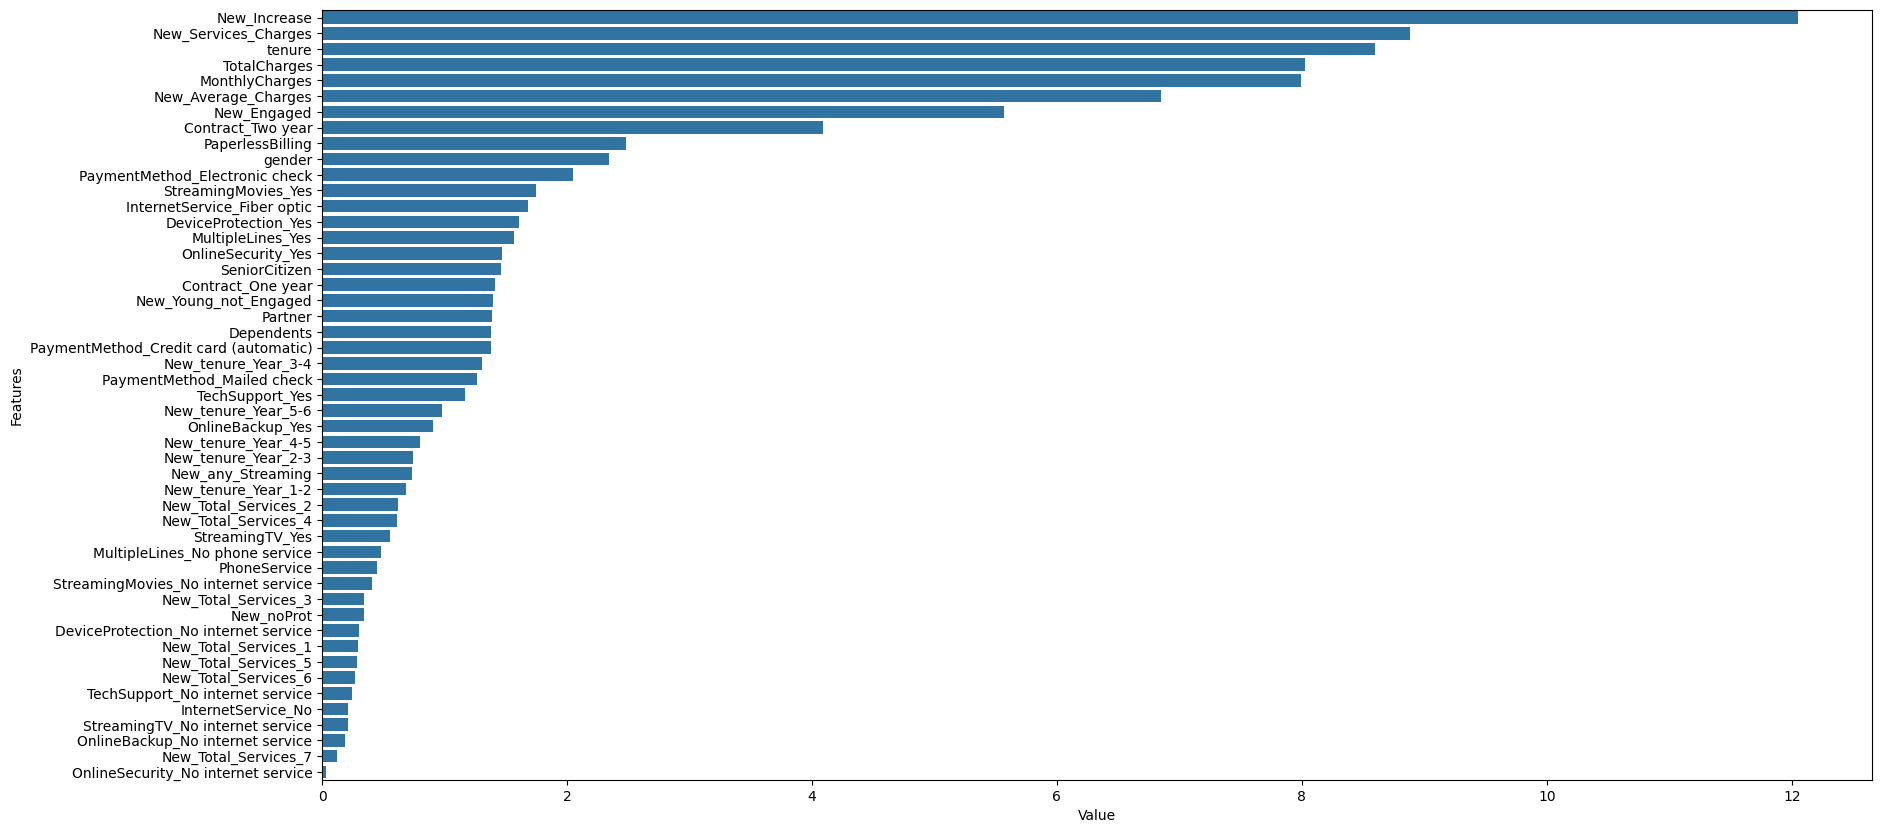

In [29]:
def plot_importance(model, features, num):
    feature_imp = pd.DataFrame({"Value" : model.feature_importances_,
                                "Features" : features.columns})
    plt.figure(figsize=(20,10))
    sns.barplot(data=feature_imp.sort_values(by="Value", ascending=False)[0:num], x="Value", y="Features")
    plt.show()
plot_importance(model, X, len(X))
# Result: New_increase shows that it is effective in increasing model success.